# Similarity and distance

Given an $n\times d$ feature matrix, we want to define disjoint subsets of the $\bfx_i$ such that the samples within a cluster are more similar to one another than they are to members of other clusters.

The first decision we have to make is how to measure *similarity*. When a distance metric is available, we consider similarity to be inversely related to distance. For example, if we have defined a distance function between pairs of vectors as $\dist(\bfx,\bfy)$, then we could define similarity as 

$$
\simil(\bfx,\bfy) = \exp \left[ - \frac{\dist(\bfx,\bfy)^2}{2\sigma^2}  \right].
$$

A distance of zero implies a similarity of 1, while the similarity tends to zero as distance increases. The scaling parameter $\sigma$ controls the rate of drop; for instance, when the distance is $\sigma$, the similarity is $e^{-1/2}\approx 0.6$. To create a distance metric from a similarity measure, we could invert the functional relationship above, provided that similarity is scaled to lie between 0 and 1.

We already have the distance metric

$$
\dist(\bfx,\bfy) = \norm{\bfx-\bfy}
$$

for any vector norm. It satisfies the three properties

1. $\dist(\bfx,\bfy)=0$ if and only if $\bfx=\bfy$,
2. $\dist(\bfx,\bfy) = \dist(\bfy,\bfx)$, and
3. $\dist(\bfx,\bfy) \le \dist(\bfx,\bfz) + \dist(\bfz,\bfy)$.

These are considered the essential axioms of a distance metric. From them, you can also deduce that the distance function is always nonnegative. 

The term *distance metric* isn't always used carefully to mean a function satisfying the three axioms, however, and a distance function derived from a similarity function may violate them. 

One other proper distance metric is **angular distance**. Generalizing from 2D and 3D vector geometry, we define the angle $\theta$ between vectors $\bfu$ and $\bfv$ in $\real^d$ by

$$
\cos(\theta) = \frac{\mathbf{u}^T\mathbf{v}}{\twonorm{\mathbf{u}} \, \twonorm{\mathbf{v}}}.
$$

Then the quantity $\theta/\pi$ is a distance metric. Because arccos is a relatively expensive computational operation, though, it's more common to use **cosine similarity**, defined as $\cos(\theta)$, and the related **cosine distance** $\tfrac{1}{2}[1-\cos(\theta)]$, even though the latter does not satisfy the triangle inequality.

Categorical variables can be included in distance measures. An ordinal variable is easily converted to equally spaced numerical values, which then may get a standard treatment. Nominal features are often compared using **Hamming distance**, which is just the total number of features that have different values in the two vectors.

## Probability distributions

A **discrete probability distribution** is a vector $\bfx$ whose components are nonnegative and satisfying $\onenorm{\bfx}=1$. Such a vector can be interpreted as frequencies or probabilities of observing different classes. One information-theoretic distance metric for probability distributions is **information radius**, defined as

$$
\operatorname{IR}(\bfu,\bfu) = \frac{1}{2} \left[ \operatorname{KL}(\bfu,\bfz) + \operatorname{KL}(\bfv,\bfz) \right],
$$

where $\bfz=(\bfu+\bfv)/2$ and KL is the *Kullback–Leibler diveregence*

$$
\operatorname{KL}(\bfx,\bfy) = \sum_{i=1}^d x_i \log\left( \frac{x_i}{y_i} \right).
$$

Typically one uses a base-2 logarithm, in which case IR ranges between 0 and 1. Note that where $0\cdot \log(0)$ is encountered in the KL definition, it equals zero, in accordance with its limiting value from calculus.

::::{prf:example}
:label: example-similarity-IR

<!-- Let $\bfu=[1,0]$ and $\bfv=[0,1]$. Then $\bfz=(\bfu+\bfv)/2=[\tfrac{1}{2},\tfrac{1}{2}]$, and

$$
\operatorname{KL}(\bfu,\bfz)  &= 1\cdot \log \left( \frac{1}{1/2} \right) + 0 \cdot \log \left( \frac{0}{1/2} \right) = 1,
\operatorname{KL}(\bfv,\bfz)  &= 0 \cdot \log \left( \frac{0}{1/2} \right) + 1 \cdot \log \left( \frac{1}{1/2} \right) = 1,
\operatorname{IR}(\bfu,\bfu)  &= \frac{1}{2} \left[ 1 + 1 \right] = 1. 
$$

Not surprisingly, these distribution vectors are as far apart as you can get.  -->

Let $\bfu=\frac{1}{4}[1,3]$ and $\bfv=\frac{1}{4}[3,1]$. Then $\bfz=(\bfu+\bfv)/2=[\tfrac{1}{2},\tfrac{1}{2}]$, and

$$
\operatorname{KL}(\bfu,\bfz)  &= \tfrac{1}{4} \cdot \log \left( \frac{1/4}{1/2} \right) + \tfrac{3}{4} \cdot \log \left( \frac{3/4}{1/2} \right) \\ &= \tfrac{1}{4} \cdot \log \left( \frac{1}{2} \right) + \tfrac{3}{4} \cdot \log \left( \frac{3}{2} \right) = -\tfrac{1}{4} + \tfrac{3}{4} (\log(3)-1),\\
\operatorname{KL}(\bfv,\bfz)  &= \tfrac{3}{4} (\log(3)-1) -\tfrac{1}{4},\\
\operatorname{IR}(\bfu,\bfu)  &= \tfrac{3}{4} (\log(3)-1) -\tfrac{1}{4} \approx 0.1887.
$$

::::


## Distance matrix

Given the feature vectors $\bfx_1,\ldots,\bfx_n$, the pairwise distances between them can be summarized by the $n\times n$ **distance matrix**

$$
D_{ij} = \text{dist}(\bfx_i,\bfx_j).
$$

Note that $D_{ii}=0$ and $D_{ji}=D_{ij}$. Many clustering algorithms allow supplying $\mathbf{D}$ in lieu of the feature vectors. One can similarly define a *similarity matrix* using the Gaussian kernel. An advantage of similarity is that small values can be rounded down to zero. This has little effect on the results, but can create big gains in execution time and memory. 

### Toy example

Suppose we have sample points lying near the corners of a cube in 3D. This lets us compute an 8×8 distance matrix.

<AxesSubplot:>

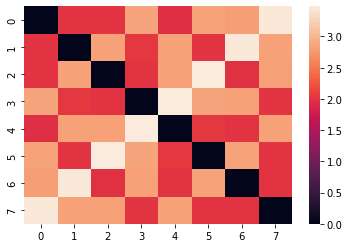

In [1]:
from sklearn.metrics import pairwise_distances
import seaborn as sns

X = [
    [-1.01,-1,-.98],[1,-1.02,-1],[-.98,1,-.99],[1.01,1.01,-1], 
    [-1.01,-1.01,.99],[1.02,-1.02,1],[-.99,.98,.99],[1,.98,1], 
]

D2 = pairwise_distances(X,metric="euclidean")
sns.heatmap(D2)

Note the symmetry. Changing to a different norm is trivial.

<AxesSubplot:>

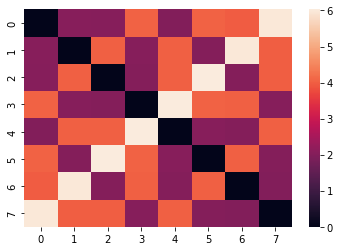

In [2]:
D1 = pairwise_distances(X,metric="manhattan")
sns.heatmap(D1)

## Distance in high dimensions

High-dimensional space [does not conform to some intuitions](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) formed by our experiences in 2D and 3D. For example, consider the unit hyperball $\twonorm{\bfx}\le 1$ in $d$ dimensions. We'll take it as given that scaling a $d$-dimensional object by a number $r$ will scale the volume by $r^d$. Then for any $r<1$, the fraction of the unit hyperball's volume lying *outside* the smaller hyperball of fixed radius $r$ is $1-r^d$, which approaches $1$ as $d\to \infty$. That is, if we choose points randomly within a hyperball, almost all of them will be near the outer boundary. 

There are other, similar mathematical results demonstrating the unexpectedness of distances in high-dimensional space. These go under the colorful name *curse of dimensionality*, and the advice given in response to them is sometimes stated as, "Don't use distance metrics in high-dimensional space." But that advice is easy to overstate. The curse is mainly about *randomly* chosen points, and it is correct that dimensions full of random, noisy, or irrelevant features will make many learning algorithms less effective. But if features carry useful information, adding them usually makes matters better, not worse.